# Digit Recognition with TensorFlow – Solution
(by: [Nicolaj Stache](mailto:Nicolaj.Stache@hs-heilbronn.de) and [Andreas Schneider](mailto:Andreas.Schneider@hs-heilbronn.de), both: Heilbronn University of Applied Sciences, Germany)

---


In this notebook we recognize hand-written digits, provided by the [MNIST-Database](https://en.wikipedia.org/wiki/MNIST_database). The notebook is designed to show how neural networks with fully connected layers can be designed for this task.

### Download MNIST Data
The first step is to load all necessary libraries. You already know about "`numpy`" and "`tensorflow`". The line "`import tflearn.datasets.mnist as mnist`" is just used for accessing the MNIST dataset with a single line of code. "`matplotlib.pyplot`" is used for data display.

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist
import matplotlib.pyplot as plt

(trainX, trainY), (testX, testY) = mnist.load_data()

### Preprocess MNIST Data
In order to use the downloaded dataset, three preprocessing steps need to be perfomed.

1. Neural networks work best with a normalized input between 0 and 1. The images in the dataset, however, are encoded as 8-Bit Integers (0 - 255). Thus, `trainX` and `testX` have to be divided by 255 in order to normalize the dataset.
2. The input images are of shape `(28, 28)` while the neural network expects an one-dimensional pixel vector. Consequently, the image data is reshaped `(28, 28)` $\rightarrow$ `(784)`. 
3. The neural network we're about to construct contains an output layer with 10 neurons, one for each digit. The labels `trainY` and `testY`, however, consist of one number per image representing the digit it contains. To fit to the network output, the labels have to be one-hot-encoded, e.g. transforming `4` into the vector `[0 0 0 0 1 0 0 0 0 0]`. TensorFlow provides the function `to_categorical()` for this purpose.

In [2]:
trainX, testX = np.reshape(trainX / 255.0, (trainX.shape[0], -1)), np.reshape(testX / 255.0, (testX.shape[0], -1))
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

### Have a look at the data
Now, let us get an overview of what we downloaded. Please be aware of the fact that getting, preprocessing, cleaning-up data is often an underestimated but very important task. Fortunately all this has been already done for us.  

> **Task:** Complement the cell below by printing three images plus labels

Number of training images, number of pixels: 
 (60000, 784)
Number of test images, number of pixels: 
 (10000, 784)


C:\Applications\Anaconda3\envs\tf2\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


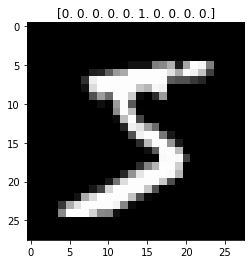

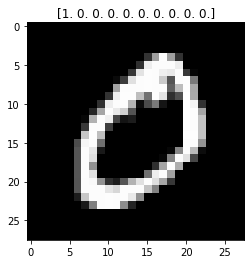

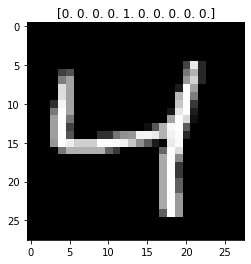

In [3]:
# Print number of training images, number of pixels
print('Number of training images, number of pixels: \n', trainX.shape)

# Print number of test images, number of pixels
print('Number of test images, number of pixels: \n', testX.shape)

%matplotlib inline

# TODO: Print out three example images with matplotlib. Also use plt.title to print out the one-hot-encoded label vector.
for i in range(0,3):
    plt.imshow(np.reshape(trainX[i], [28, 28]), cmap='gray')
    plt.title(trainY[i])
    plt.show()

By `trainX`, `testX`, we distinguish between training and test images. It is important to leave the test data untouched until the end, when the accuracy shall be evaluated. Actually, it is recommended to create three datasets: Training data for the training - as the name implies, validation data for testing but also making improvements on the network architecure and hyperparameters, and finally test data to evaluate the result. For the sake of simplicity in this example, we will use training and testing data only. In the next tutorial, a way is presented to create a validation dataset from the training data.

"`X`" in `trainX` or `testX` refers to the input, "`Y`" refers to the gold standard of the output, respectively. `trainY`, `testY` contain the corresponding label in a special format (one-hot vector). The position of the one in the vector indicates the digit-number. This is a very practical way for using neural networks with categorical features.

### Network design

We now want to design and train a neural network to recognize digits. 

The input of the network is the flattened image, which means that all pixels are arranged in just one line of length $28 \cdot 28 = 784$ pixels.

The output of the network is a vector of length 10, which contains values corresponding to probabilities. This means, every entry in the output can be interpreted as a likelihood of the cooresponding digit. The position of the maximum likelihood in the output vector can be found via "`np.argmax(output)`" - we use this as the resulting prediction of the digit. 

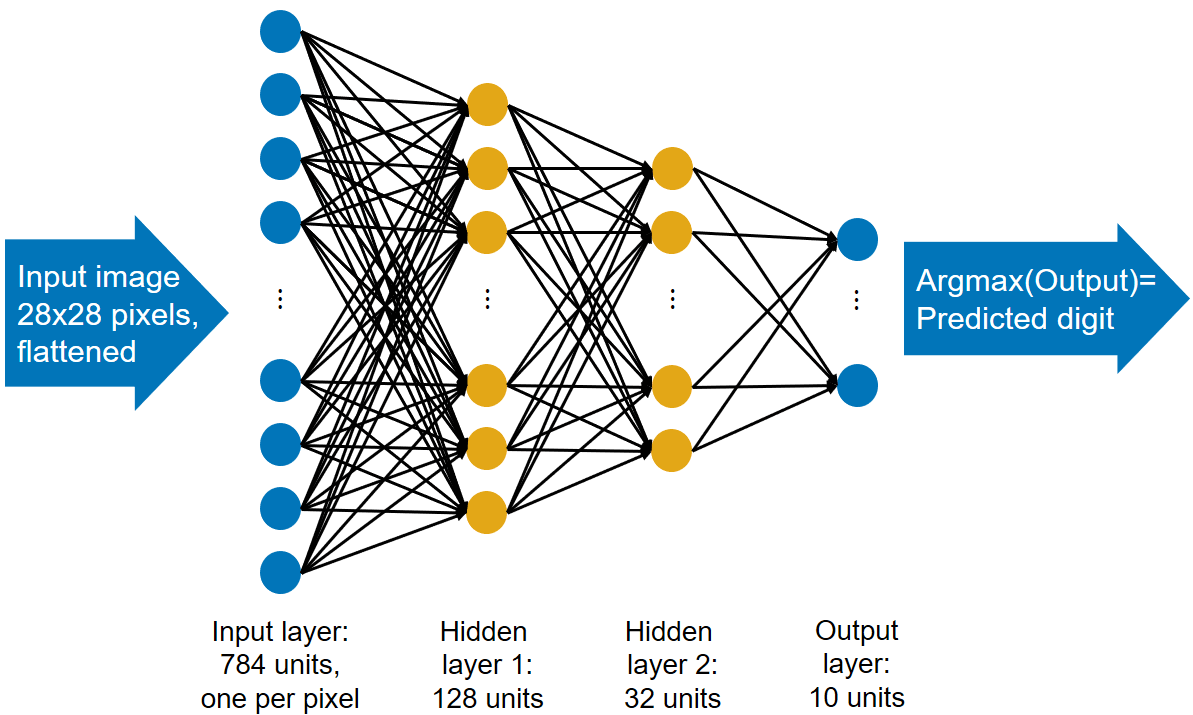

Next, we build the network architecture. 

### Definition of the network structure
Here, we define the layers of the network, starting with the first real layer, which is the hidden layer h1. The use of `tf.keras.layers` simplifies the definition significantly. We picked a dense layer, which just means that the layer h1 is connected to its input as shown in the figure above: Each neuron of this layer is connected with each neuron in the next layer. We will later learn about other types of layers. 

One important factor is the number of neurons (= units) in this layer, which is set to 128, according to the figure. The activation function is defined as rectified linear unit (= relu). The equation of the relu function is $relu(x)=max(x,0)$, i.e. the output is either the input, if it is positive, or it is 0. The weights and biases are initialized by small gaussian noise of standard deviation of 0.1. However, large (outlier) values are cut off in the noise, for better performance - hence it is called *tuncated*_normal_initializer

Additionally, you find that dropout is applied to the layers h1 and h2. During training, a percentage, specified by the "`rate`"-parameter, is randomly left out. This has shown to make the network generalize better from the input data. 

Finally, we have the last layer with 10 output units, corresponding to our one-hot-encoded labels. The output is named logits, this is common for outputs which are intended to be mapped to output probabilites by a softmax function.

> TODO: Specify missing layer below. The layer must match the size which is specified in the sketch of the network design.

In [6]:
# Definition of the network structure 

inputs = tf.keras.layers.Input(shape=trainX.shape[1])

x = tf.keras.layers.Dense(128,
                          activation='relu', name='h1',
                          kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.1),
                          bias_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.1))(inputs)

x = tf.keras.layers.Dropout(rate=0.1)(x)

# TODO: Specify dense layer and dropout layer below
x = tf.keras.layers.Dense(32,
                           activation='relu', name='h2',
                           kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.1),
                           bias_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.1))(x)
x = tf.keras.layers.Dropout(rate=0.1)(x)

logits = tf.keras.layers.Dense(10, name='logits',
                               activation=None,
                               kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.1),
                               bias_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.1))(x)

model = tf.keras.Model(inputs=inputs, outputs=logits)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
h1 (Dense)                   (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
h2 (Dense)                   (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
logits (Dense)               (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_______________________________________________________

### Definiton of cost function and optimizer
The cost function's output "`cost`" is the mean of the [softmax cross entropy with logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits). This is a common way for measuring the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class). 

The optimizer to determine parameters in order to minimize cost is defined to "Gradient Descent Optimizer" 

When training steps are performed, it is necessesary to validate the performance of the network on a validation dataset (or finally on the test dataset). For this, the compuation of the accuracy is needed. That's why we pass the "`accuracy`" flag to the metrics parameter of the "`compile`" function.

In [7]:
# definition of optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# definition of cost fuction
cost = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# model compilation
model.compile(optimizer = optimizer, 
              loss = cost,
              metrics=['accuracy'])

### Split data into batches
Before we start training, we need a way to divide the training data into smaller slices, called batches. Otherwise the data would not fit into available memory. The assumption is that the data of every batch roughly has the same stochatic properties as the entire data set. An evaluation of the cost function and training step is done for every batch. 

To split-up the data, a so-called generator is defined below. One advantage of a generator is that it can be used as an iterator in a for loop (see next code block)

In [8]:
def get_batches(x, y, batch_size=128):
    """ Return a generator that yields batches from arrays x and y. """
    n_batches = len(x)//batch_size  # number of full batches
    
    for ii in range(0, n_batches*batch_size, batch_size):
        X, Y = x[ii: ii+batch_size], y[ii: ii+batch_size] 
        yield X, Y

gen = get_batches(trainX, trainY, 128)


### Define hyperparameters, execute network
Hyperparameters are the tuning knobs for the training process of the network. Here, we have three prominent parameters:
- `epochs`: This is the number of how many times the entire training dataset is used in the training process. 
- `learning_rate`: Influences how much the parameters are modified from training iteration to iteration. If the learning rate is high, training can go faster but it could happen that the optimizer diverges because gradient descent jumps out of the desired minimum
- `batch_size`: number of input vectors which are processed (in parallel) to determine new weights. 

The optimization runs in an outer loop over the epochs and an inner loop over the batches. The optimization itself is just this single line of code: "`model.train_on_batch(x,y)`"

In [9]:
# Hyperparameters

# TODO: find optimal set of hyperparameters
epochs = 5 #12, 15, 100, 
learning_rate = 0.1 #0.4, 0.2, 1
batch_size = 64 #128 -> 0.97, 64 -> 0.978, 500 -> 0.9796

# Do not use GPU: otherwise it causes trouble when multiple users are logged-in 
config = tf.compat.v1.ConfigProto(
    device_count = {'GPU' : 0})

optimizer.learning_rate = learning_rate
# Start the computation
for e in range(epochs):
    for x, y in get_batches(trainX, trainY, batch_size):
        # training
        loss, _ = model.train_on_batch(x,y)

    # testing
    test_loss, test_acc = model.evaluate(testX, testY)  

    print("Epoch: {:2}/{}".format(e+1, epochs),
          "Training loss: {:.5f}".format(loss), 
          'Test Accuracy: {:.4f}'.format(test_acc))
    
model.save_weights("./Mnist-Digits.h5")



10000/10000 [==============================] - 0s 21us/sample - loss: 0.2216 - accuracy: 0.9337
Epoch:  1/5 Training loss: 0.35615 Test Accuracy: 0.9337
10000/10000 [==============================] - 0s 16us/sample - loss: 0.1489 - accuracy: 0.9536
Epoch:  2/5 Training loss: 0.31084 Test Accuracy: 0.9536
10000/10000 [==============================] - 0s 16us/sample - loss: 0.1200 - accuracy: 0.9631
Epoch:  3/5 Training loss: 0.35244 Test Accuracy: 0.9631
10000/10000 [==============================] - 0s 16us/sample - loss: 0.1070 - accuracy: 0.9664
Epoch:  4/5 Training loss: 0.28097 Test Accuracy: 0.9664
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0967 - accuracy: 0.9707
Epoch:  5/5 Training loss: 0.23441 Test Accuracy: 0.9707


With optimized hyperparameters, a test accuracy of > 95 % is achievable. 

> __TODO: Try to find your optimal set of hyperparameters!__ Which set gains the hightest test accuracy. Please also try out, what happens if the learning rate is too high, e.g. `learn_rate = 5`.

> __TODO: Use Adam-Optimizer instead of Gradient Descent!__ For using Adam-Optimizer, replace the optimizer definition by: "`tf.keras.optimizers.Adam(learning_rate=1e-3)`". After that recompile the model. Adam-Optimizer uses (among others) an adaptive learning rate - the parameter learning_rate is in our case not needed any more. 

### Load and apply the neural network

> **TODO**: Please do a cell which implements the network inference. This means you take e.g. 4 sample from the test dataset and let the network predict it.

4 Predictions :  [8 8 7 2]
4 Labels:        [8 8 7 2]


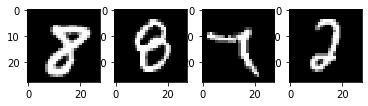

In [10]:
from random import randint
startValueRandom = randint(0, testX.shape[0])

# number of images to evaluate (between 1 and 9)
amountOfTestPictures = 4 

# Restore trained network
model.load_weights("./Mnist-Digits.h5")   

# TODO: get test images
test_images = testX[startValueRandom:startValueRandom+amountOfTestPictures,:] 

# TODO: run forward pass (inference)
prediction = model.predict(test_images)


print(amountOfTestPictures,'Predictions : ', np.argmax(prediction, axis=1))
print(amountOfTestPictures,'Labels:       ', np.argmax(testY[startValueRandom:startValueRandom+amountOfTestPictures,:], axis=1))

# show corresponding images
index = startValueRandom
fig = plt.figure()
for i in range(0,amountOfTestPictures):
    fig.add_subplot(100 + amountOfTestPictures*10 + 1 + i).imshow(np.reshape(testX[startValueRandom+i], [28, 28]), cmap='gray')     
plt.show()